In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches

In [126]:
# Read dataset
data = pd.read_csv('world_cups_finalists.csv')

In [127]:
world_cup_finalists = list(set(list(data['winner']) + list(data['loser'])))
len(world_cup_finalists)

13

In [158]:
# Create points for each world cup finalist
points = dict()
for i in range(len(world_cup_finalists)):
    points[world_cup_finalists[i]] = [i,0,1]

<IPython.core.display.Javascript object>


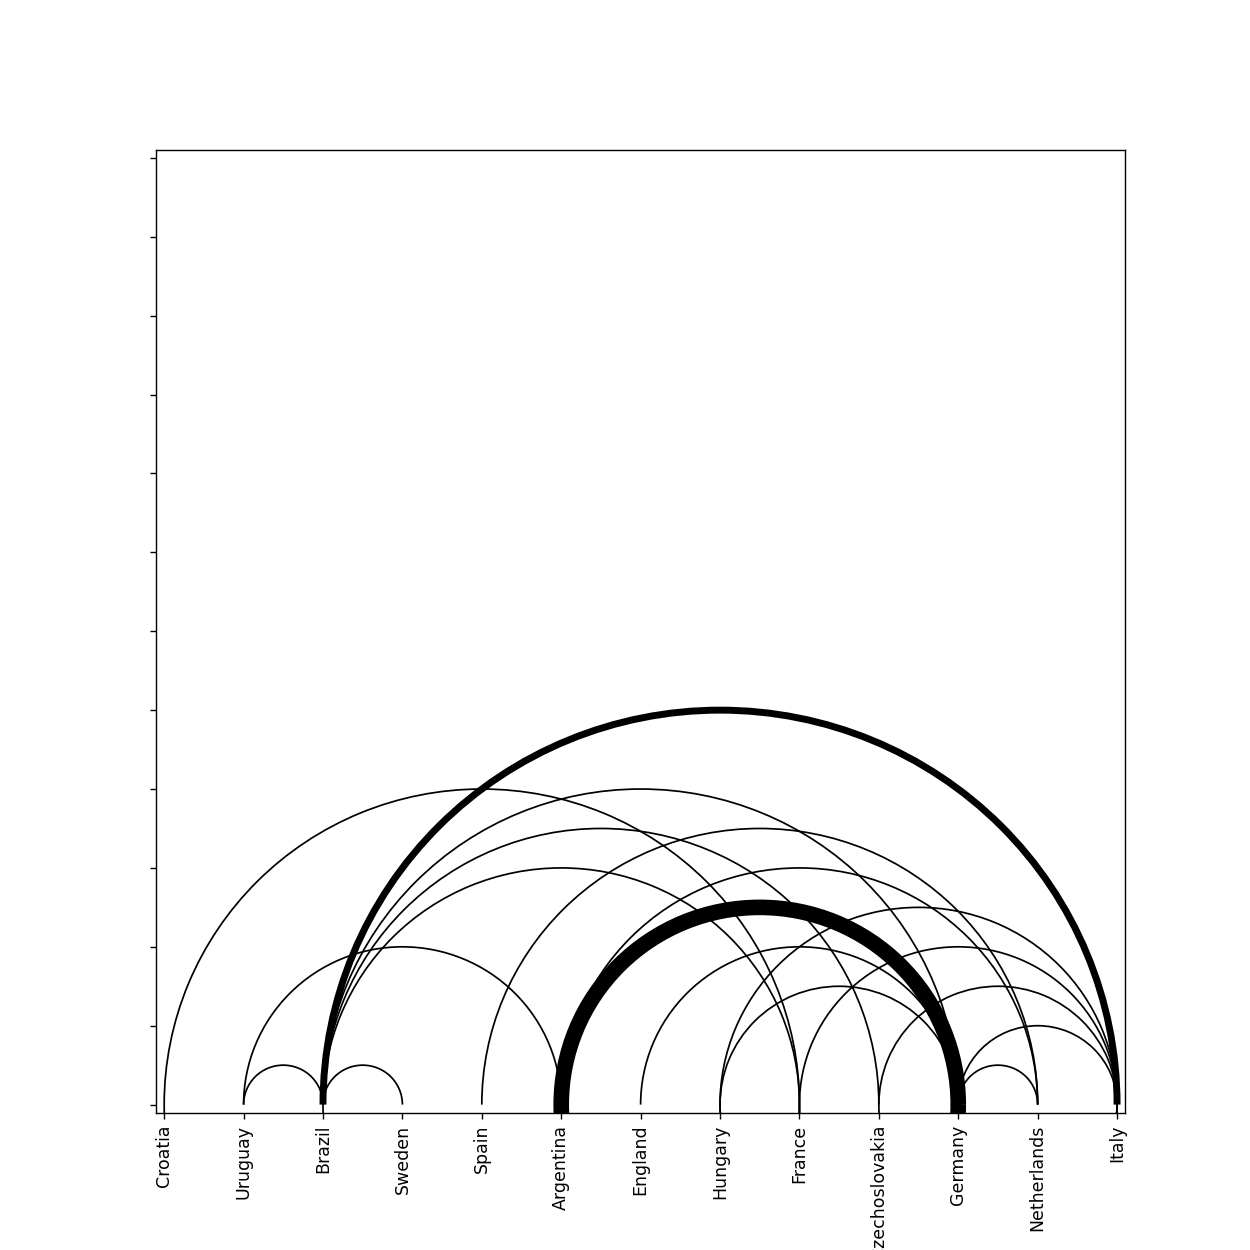

In [167]:
# calculate the arc
arcs = []
matches = []
for i in range(len(data)):
    winner = data['winner'][i]
    loser = data['loser'][i]
    x1, y1 = points[winner][0], points[winner][1]
    x2, y2 = points[loser][0], points[loser][1]
    mxmy = mx, my = [(x1 + x2) / 2, (y1 + y2) / 2]
    r = np.sqrt((x1 - mx)**2 + (y1 - my)**2)
    width = 2 * r
    height = 2 * r
    start_angle = np.arctan2(y1 - my, x1 - mx) * 180 / np.pi
    end_angle = np.arctan2(my - y2, mx - x2) * 180 / np.pi
    match = min(winner,loser) + max(winner,loser)
    matches.append(match)
    linewidth = matches.count(match) ** 2
    arc = patches.Arc(mxmy, width, height, start_angle, end_angle, linewidth=linewidth)
    arcs.append(arc)
    
fig, ax = plt.subplots(1,1, figsize=(10, 10))
for arc in arcs:
    ax.add_patch(arc)


ax.set_xticks([x for x in range(len(world_cup_finalists))])
ax.set_xticklabels(world_cup_finalists,rotation=90)
ax.set_yticks([x for x in range(len(world_cup_finalists))])
ax.set_yticklabels([])
ax.set_xlim(-0.1, 12.1)
ax.set_ylim(-0.1, 12.1)
plt.show()